In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm 

In [36]:
df = pd.read_csv('./io500_results_cal.csv')
df

,Test,find,ior-easy-read,ior-easy-write,IOR-EASY,ior-hard-read,ior-hard-write,IOR-HARD,mdtest-easy-stat,mdtest-easy-write,mdtest-easy-delete,MDTEST-EASY,mdtest-hard-stat,mdtest-hard-read,mdtest-hard-write,mdtest-hard-delete,MDTEST-HARD,IOR,MDTEST
0,Result,251.578971,6.552060,2.427936,3.988481,0.278692,0.423341,0.343485,125.730657,31.498597,39.497294,53.880702,116.680832,30.796766,6.454765,7.489967,20.415792,3.644996,33.464910
1,Result_2,435.963585,6.541544,2.444939,3.999209,0.220550,0.355009,0.279816,138.052268,30.683907,40.120971,55.391341,121.535279,30.112890,6.510550,6.966745,20.184853,3.719393,35.206488
2,Result_3,280.907294,6.551668,2.445397,4.002678,0.262290,0.387592,0.318844,139.602765,32.830680,41.432437,57.478416,111.067120,31.691271,6.705514,7.406482,20.447598,3.683834,37.030818
3,Result_4,238.150329,6.551181,2.438937,3.997239,0.241038,0.461955,0.333690,116.917249,32.198474,42.108923,54.120608,122.512403,31.937272,6.500968,7.356265,20.798323,3.663549,33.322285
4,Result_5,30.341691,6.558521,2.420256,3.984131,0.254355,0.419858,0.326792,137.255466,34.297154,43.576788,58.976770,117.031837,30.204524,6.631946,7.732748,20.634204,3.657339,38.342566
5,Result_6,382.098935,6.530513,2.455826,4.004723,0.271841,0.423674,0.339370,137.648761,31.451299,42.708129,56.969247,117.164648,31.405922,6.548446,7.289304,20.471898,3.665353,36.497349
6,Result_7,306.070990,6.550253,2.403937,3.968173,0.231835,0.360819,0.289224,128.240196,29.946948,40.315043,53.696745,121.320399,30.738776,6.843561,7.273583,20.756912,3.678949,32.939833
7,Result_8,437.703248,6.541416,2.356745,3.926379,0.293890,0.397322,0.341715,85.809280,10.083695,41.280412,32.933104,112.643369,30.680315,6.203067,7.383895,19.946392,3.584664,12.986711
8,Result_9,389.464963,6.557634,2.311218,3.893086,0.375133,0.429261,0.401285,151.548171,28.923479,44.044745,57.796088,147.154685,31.263243,4.896629,7.234016,20.091909,3.491801,37.704179
9,Result_10,350.056689,6.520246,2.417063,3.969867,0.279891,0.386626,0.328958,120.635389,31.464099,40.344636,53.500595,118.829119,31.213962,6.289798,7.089339,20.166408,3.640910,33.334187


In [37]:
selected_columns = df[['IOR-HARD','IOR-EASY', 'MDTEST-HARD', 'MDTEST-EASY']].round(4)

/tmp/ph077533/login23-1_174263/ipykernel_268959/3624047991.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map_1 = cm.get_cmap('Dark2')


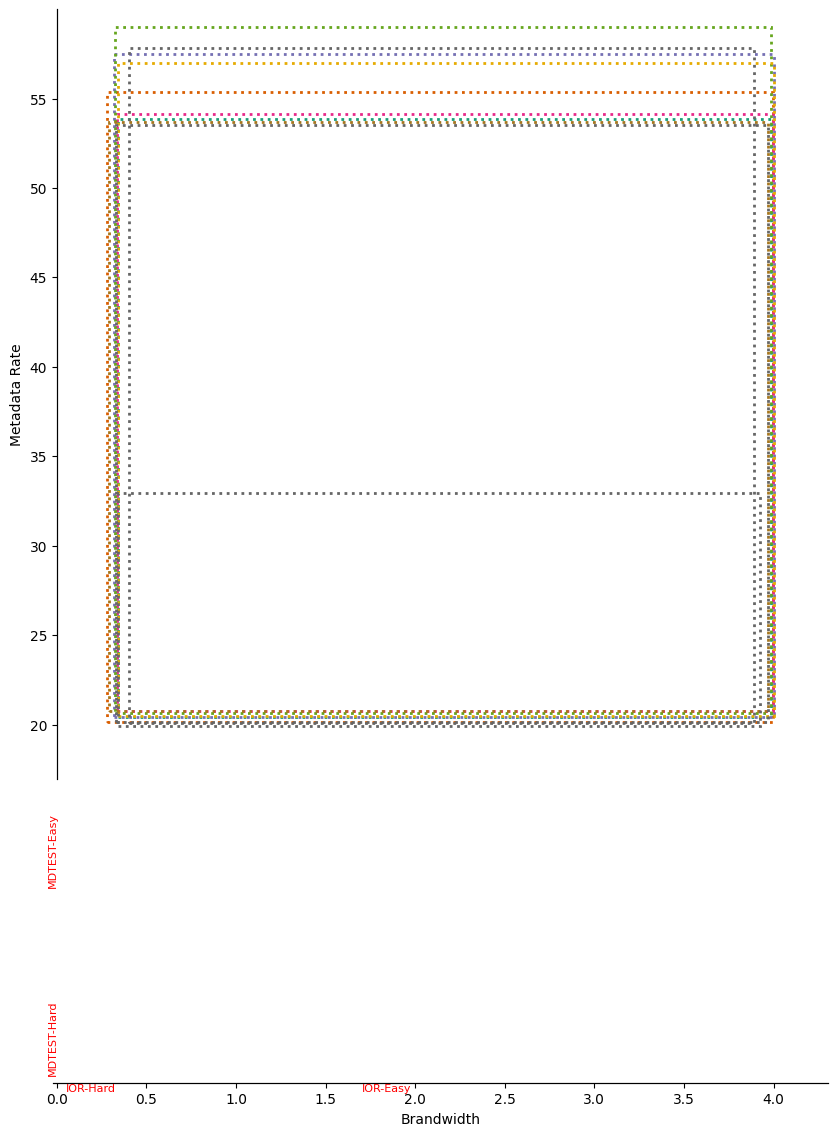

In [38]:
color_list = []
selected_columns = df[['IOR-HARD','IOR-EASY', 'MDTEST-HARD', 'MDTEST-EASY']].round(4)

# 새로운 플롯 생성
fig, ax = plt.subplots(figsize=(10,10),dpi=100)
color_map_1 = cm.get_cmap('Dark2')

j=0
check_list =[]

for index, row in selected_columns.iterrows():
    x_min, x_max = row['IOR-HARD'], row['IOR-EASY']
    y_min, y_max = row['MDTEST-HARD'], row['MDTEST-EASY']

    if y_min > y_max:
        y_min, y_max = y_max, y_min  # 값 교환 
        alpha = 0.8
        linewidth=2
        fill = True
        alpha = alpha - 0.3
        check_list.append(True)
    else:
        alpha = 1
        linewidth=2
        face_color = 'None'
        fill = False
        check_list.append(False)

    edge_color = color_map_1(j)
    face_color = edge_color 
    j += 0.14
    color_list.append(edge_color)
    width = x_max - x_min
    height = y_max - y_min
    ax.add_patch(patches.Rectangle((x_min, y_min), width, height,edgecolor=edge_color, facecolor = face_color, alpha=alpha, linewidth=linewidth, linestyle=':' , fill = fill))

# Move the origin to the center
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')
ax.spines['top'].set_position('zero')


# ax.set_xticks([])
# ax.set_yticks([])

ax.set_xlabel('Brandwidth')
ax.set_ylabel('Metadata Rate')

# 축 범위 조정 (필요에 따라 수정)
ax.set_xlim(df['IOR-HARD'].min()-0.3, df['IOR-EASY'].max()+0.3)
ax.set_ylim(df['MDTEST-HARD'].min()-3, df['MDTEST-EASY'].max()+1)


ax.text(-0.05, 11, 'MDTEST-Easy', fontsize=8, rotation=90,color='red')
ax.text(-0.05, 0.5, 'MDTEST-Hard', fontsize=8, rotation=90, color='red')
ax.text(0.05, -0.5, 'IOR-Hard', fontsize=8, color='red')
ax.text(1.7, -0.5, 'IOR-Easy', fontsize=8, color='red')
# 축의 범위 설정


plt.show()


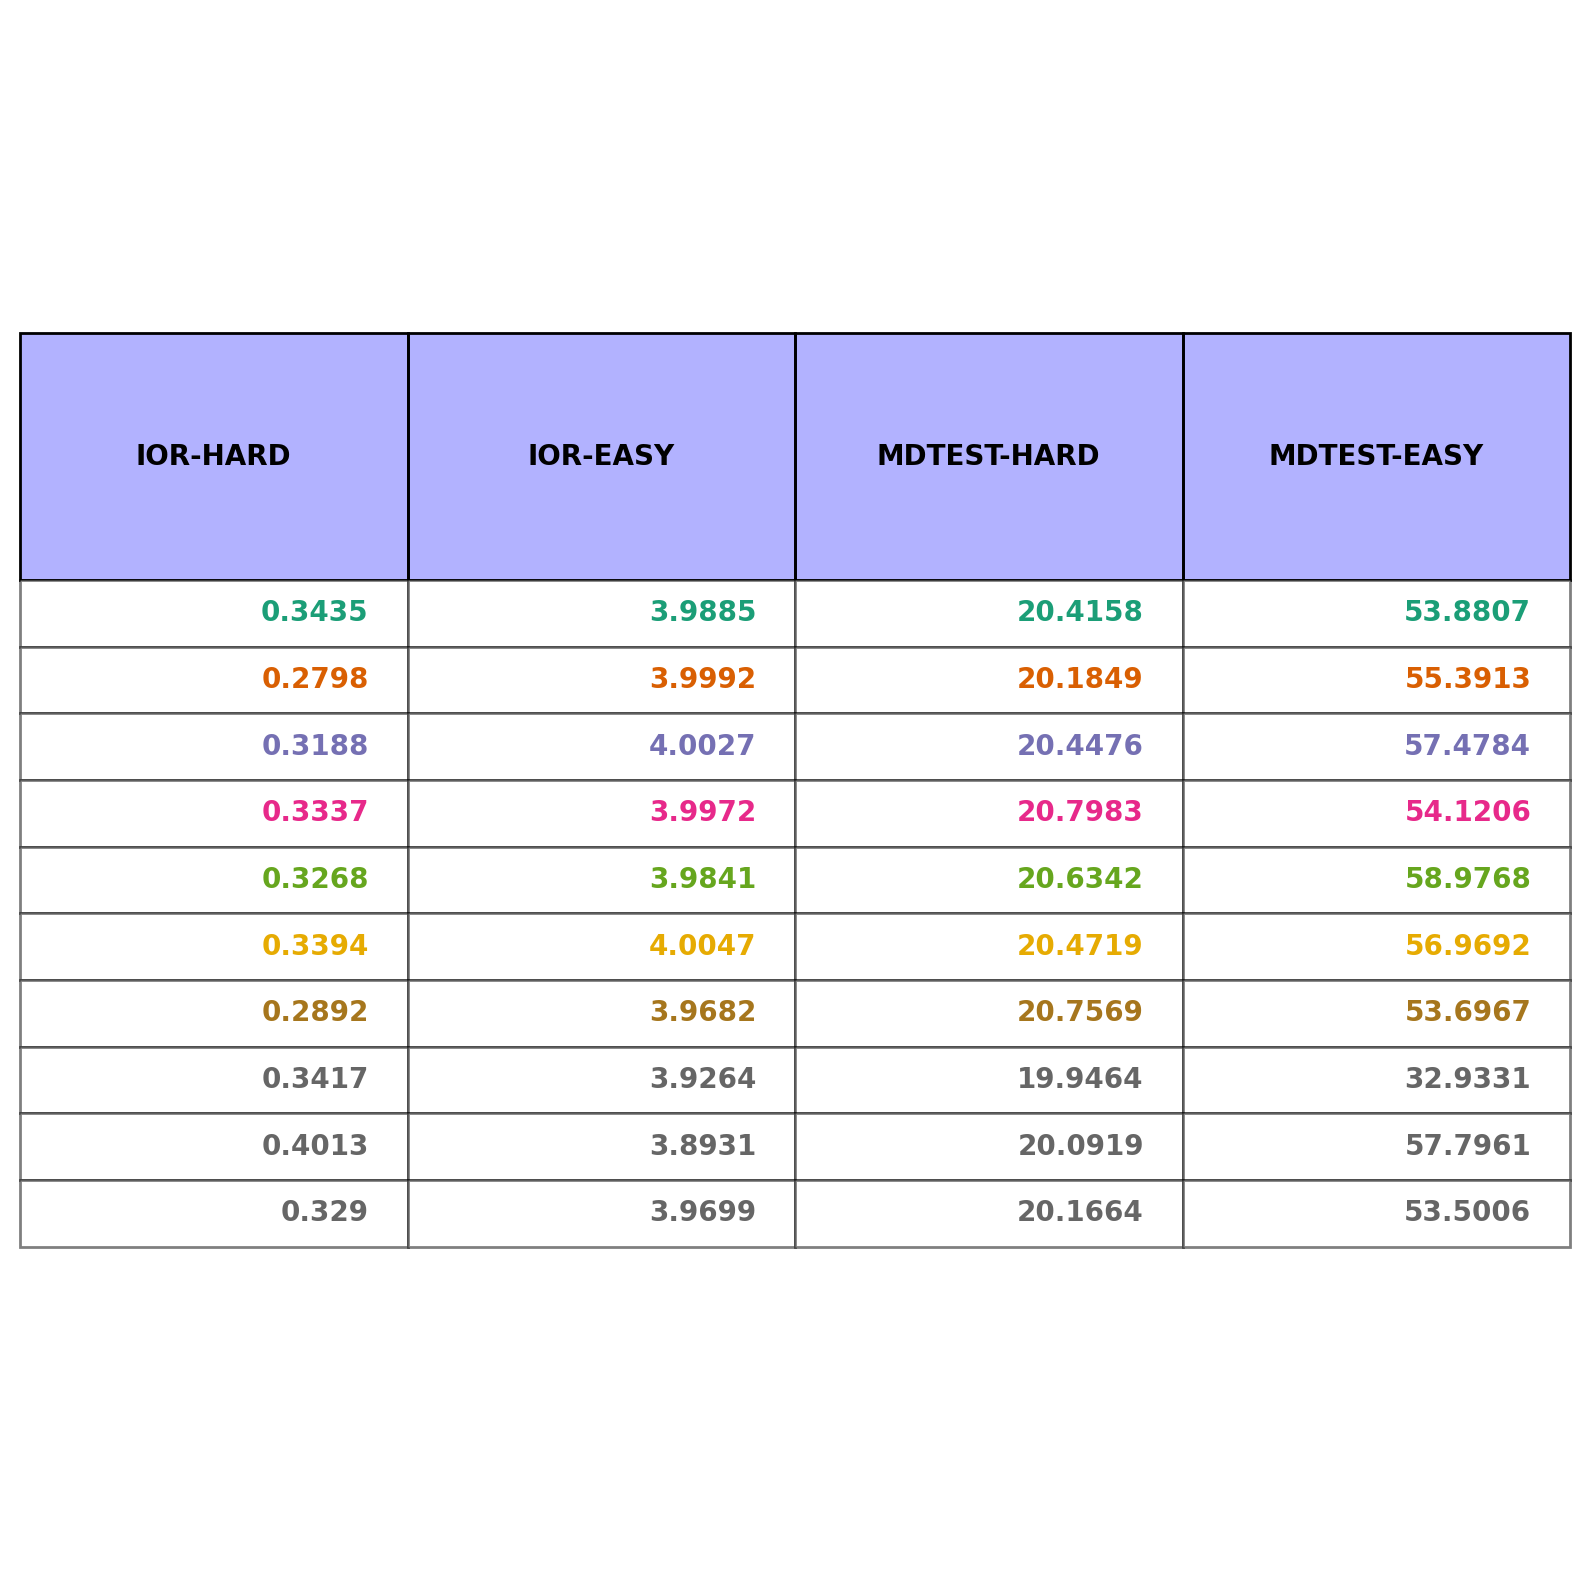

In [39]:
fig2, ax2 = plt.subplots(figsize=(10, 10), dpi=200)  # 플롯 크기 설정
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(cellText=selected_columns.values, colLabels=selected_columns.columns, loc='center')

for key, cell in table.get_celld().items():
    cell.set_edgecolor(color=(0,0,0,0.5))

# design header
for key, cell in table.get_celld().items():
    if key[0] == 0:  
        cell.set_facecolor(color=(0,0,1,0.3))
        cell.set_text_props(color='black', fontweight='bold')
        cell.set_height(0.08)
        cell.set_edgecolor(color=(0,0,0,1))
    else :
        cell.set_text_props(color=color_list[key[0]-1], fontweight='bold')
        
        

for i in range(1, len(check_list)+1) :
    if check_list[i-1] :
        cell = table.get_celld()[(i,2)]
        cell.set_facecolor(color=color_list[i-1])
        cell.set_text_props(color='white', fontweight='bold')
        cell = table.get_celld()[(i,3)]
        cell.set_facecolor(color=color_list[i-1])
        cell.set_text_props(color='white', fontweight='bold')


table.scale(1,2)
plt.show()

(-3.0, 39.3426)

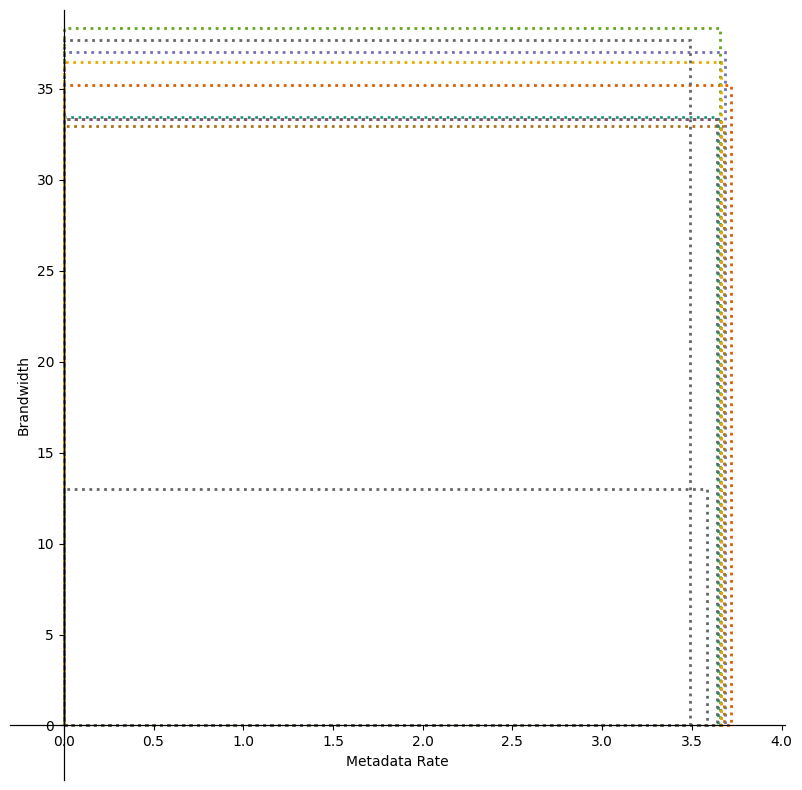

In [41]:
df = selected_columns = df[['IOR', 'MDTEST']].round(4)
fig3, ax3 = plt.subplots(figsize=(10,10),dpi=100)
i=0
for index, row in selected_columns.iterrows():
    x_min, x_max = 0, row['IOR']
    y_min, y_max = 0, row['MDTEST']

    # y_min이 y_max보다 크면 값을 교환하고 테두리 색상을 빨간색으로 설정
    if y_min > y_max:
        y_min, y_max = y_max, y_min  # 값 교환 
        alpha = 0.8
        linewidth=2
        fill = True
        alpha = alpha - 0.3


    else:
        alpha = 1
        linewidth=2
        face_color = 'None'
        fill = False
        check_list.append(False)

    edge_color = color_list[i]
    face_color = edge_color 
    i+=1
    color_list.append(edge_color)
    width = x_max - x_min
    height = y_max - y_min
    ax3.add_patch(patches.Rectangle((x_min, y_min), width, height,edgecolor=edge_color, facecolor = face_color, alpha=alpha, linewidth=linewidth, linestyle=':' , fill = fill))

# 원점을 중앙으로 이동
ax3.spines['left'].set_position('zero')
ax3.spines['bottom'].set_position('zero')
ax3.spines['right'].set_position('zero')
ax3.spines['top'].set_position('zero')



ax3.set_xlabel('Metadata Rate')
ax3.set_ylabel('Brandwidth')

# 축 범위 조정 (필요에 따라 수정)
ax3.set_xlim(-0.3, df['IOR'].max()+0.3)
ax3.set_ylim(-3, df['MDTEST'].max()+1)